The data is downloaded by the following solar panel conditions:

### Número de paneles necesarios para abastecer una casa

El número de paneles necesarios para abastecer una casa depende de varios factores, incluyendo el consumo promedio de energía de la casa, la irradiación solar en la ubicación, la eficiencia del sistema y las horas de sol al día. Vamos a desglosarlo:

---

### 1. **Consumo promedio de energía de una casa**
El consumo de energía varía según la región y los hábitos de los habitantes. Por ejemplo:

- En **Colombia**, una casa promedio consume entre **250 y 300 kWh/mes**.
- Esto equivale a aproximadamente:
  
  Consumo diario promedio = $\frac{300 \, kWh}{30 \, días} = 10 \, kWh/día.$
  

---

### 2. **Producción diaria por panel solar**
Para un panel de **0.59 kWp**, la energía diaria que genera depende de las horas de sol pico (HSP), que son las horas equivalentes de irradiación solar de 1000 W/m² al día. 

#### Supongamos:
- **HSP en Colombia**: Entre **4 y 6 horas/día** (depende de la región).
- Energía diaria por panel:
  
  Energía generada = Potencia pico (kWp) \times HSP.
  
  Por ejemplo, si HSP = 5:
  
  Energía generada $= 0.59 \, kWp \times 5 \, horas = 2.95 \, kWh/día.$
  

---

### 3. **Número de paneles necesarios**
Para cubrir **10 kWh/día**, se calcula:

Número de paneles = $\frac{Consumo diario}{Energía diaria por panel}$.


Número de paneles = $\frac{10}{2.95} \approx 4 \,$ paneles.


---

### 4. **Factores adicionales**
- **Pérdidas del sistema**: Por cableado, inversor, inclinación, etc., se pierde entre **10% y 20%** de la energía.
  - Ajustando por pérdidas 20%:
    
    Número ajustado de paneles $= 4 \times 1.2 \approx 5 \, paneles.$
    
- **Autonomía o almacenamiento**: Si deseas almacenar energía (por ejemplo, con baterías) para uso nocturno o en días nublados, necesitarás más paneles y un sistema de almacenamiento adecuado.

---

### **Conclusión**
Para una casa promedio en Colombia con un consumo de **10 kWh/día**, necesitarías alrededor de **5 paneles solares** de **0.59 kWp** cada uno, asumiendo condiciones óptimas de irradiación y un sistema bien diseñado.



Por tanto, para descargar los datos, consideramos valores tomados cada hora desde el año 2018 hasta el año 2023 para los 32 departamentos de Colombia.

Con una pérdida del sistema de 16% y un kWp de 5.9.

In [39]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from shapely.geometry import Point
import geopandas as gpd

In [40]:
# Load the data

# Ruta de la carpeta con los archivos CSV
folder_path = "../data/raw/AllDepartments/"

# Lista para almacenar los DataFrames
dataframes = []

# Recorrer cada archivo CSV en la carpeta
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):  # Verificar que sea un archivo CSV
        # Ruta completa del archivo
        file_path = os.path.join(folder_path, file_name)
        
        # Leer el archivo, ignorando las primeras N filas y últimas M
        df = pd.read_csv(
            file_path,
            skiprows=10,       
            skipfooter=13,     
            engine="python"   # Necesario para skipfooter
        )
        
        # Añadir el nombre del departamento como columna
        department_name = file_name.replace(".csv", "")
        df["Departamento"] = department_name
        
        # Limpiar columnas innecesarias 
        df = df[["time", "P", "Gb(i)","Gr(i)","Gd(i)", "H_sun","T2m","WS10m","Departamento"]]
        
        # Agregar el DataFrame limpio a la lista
        dataframes.append(df)

# Combinar todos los DataFrames en uno solo
combined_df = pd.concat(dataframes, ignore_index=True)

In [41]:
combined_df.sample(10)

,time,P,Gb(i),Gr(i),Gd(i),H_sun,T2m,WS10m,Departamento
122066,20191206:0230,0.00,0.00,0.00,0.00,0.00,27.29,2.28,Magdalena
969540,20200817:1230,113.73,0.77,1.76,50.47,25.36,23.53,0.90,Casanare
1625004,20230602:1230,590.09,119.17,3.50,83.79,23.97,22.93,0.28,Amazonas
356281,20220827:0130,0.00,0.00,0.00,0.00,0.00,25.84,2.48,Meta
736249,20180104:0130,0.00,0.00,0.00,0.00,0.00,18.88,0.28,Santander
1609106,20210809:0230,0.00,0.00,0.00,0.00,0.00,24.50,0.62,Amazonas
271085,20181207:0530,0.00,0.00,0.00,0.00,0.00,23.67,1.31,Vichada
1652058,20200703:1830,1820.70,328.79,14.55,274.80,62.59,21.92,1.66,ValleCauca
287634,20201026:1830,2445.40,690.33,20.26,167.68,53.59,31.14,2.62,Vichada
186420,20210409:1230,225.57,0.00,1.79,88.29,20.04,19.67,0.41,Cauca


In [42]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682688 entries, 0 to 1682687
Data columns (total 9 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   time          1682688 non-null  object 
 1   P             1682688 non-null  float64
 2   Gb(i)         1682688 non-null  float64
 3   Gr(i)         1682688 non-null  float64
 4   Gd(i)         1682688 non-null  float64
 5   H_sun         1682688 non-null  float64
 6   T2m           1682688 non-null  float64
 7   WS10m         1682688 non-null  float64
 8   Departamento  1682688 non-null  object 
dtypes: float64(7), object(2)
memory usage: 115.5+ MB


In [43]:
data = combined_df.copy()

In [44]:
print(data[52580:52590])  # Muestra las filas cercanas al error


                time        P   Gb(i)  Gr(i)   Gd(i)  H_sun    T2m  WS10m  \
52580  20231231:2030  2047.82  574.75  11.03  138.42  31.05  31.66   2.48   
52581  20231231:2130   863.82  205.48   4.01   92.16  18.27  30.86   2.69   
52582  20231231:2230  2703.08  634.60   4.01  346.16   4.93  30.02   2.76   
52583  20231231:2330     0.00    0.00   0.00    0.00   0.00  28.80   2.62   
52584  20180101:0030     0.00    0.00   0.00    0.00   0.00  20.87   0.21   
52585  20180101:0130     0.00    0.00   0.00    0.00   0.00  20.30   0.07   
52586  20180101:0230     0.00    0.00   0.00    0.00   0.00  20.05   0.21   
52587  20180101:0330     0.00    0.00   0.00    0.00   0.00  19.79   0.21   
52588  20180101:0430     0.00    0.00   0.00    0.00   0.00  19.41   0.21   
52589  20180101:0530     0.00    0.00   0.00    0.00   0.00  18.78   0.55   

         Departamento  
52580         Cordoba  
52581         Cordoba  
52582         Cordoba  
52583         Cordoba  
52584  NorteSantander  
52585  N

In [45]:
# Correct the time column

# Convert to datetime
data['time'] = pd.to_datetime(data['time'], format='%Y%m%d:%H%M')
data.sample(10)

,time,P,Gb(i),Gr(i),Gd(i),H_sun,T2m,WS10m,Departamento
1465581,2023-03-24 21:30:00,1479.52,424.16,5.45,94.58,18.07,32.21,0.83,Guainia
1459653,2022-07-20 21:30:00,1427.77,392.91,5.14,97.78,17.59,28.58,0.83,Guainia
1018001,2020-02-27 17:30:00,2596.98,709.14,26.43,174.35,68.95,26.87,3.31,SanAndres
38249,2022-05-13 17:30:00,1721.60,270.47,17.88,326.44,77.68,29.89,1.10,Cordoba
1668464,2022-05-18 08:30:00,0.00,0.00,0.00,0.00,0.00,18.83,0.62,ValleCauca
303328,2022-08-11 16:30:00,2349.92,715.23,27.58,116.27,79.10,29.38,0.90,Vichada
1198547,2022-10-04 11:30:00,1459.07,392.48,3.56,89.89,9.83,21.84,1.59,Huila
930613,2022-03-09 13:30:00,2103.68,537.73,11.08,153.00,33.20,14.87,0.55,Antioquia
13811,2019-07-30 11:30:00,69.11,8.06,0.86,27.61,7.42,23.78,1.59,Cordoba
1181815,2020-11-06 07:30:00,0.00,0.00,0.00,0.00,0.00,24.21,0.83,Huila


In [46]:
# add loingitude and latitude

departments_coordinates = {
    'Amazonas': {'latitude': -1.54, 'longitude': -71.5},
    'Antioquia': {'latitude': 6.7, 'longitude': -75.5},
    'Arauca': {'latitude': 6.56, 'longitude': -70.96},
    'Atlantico': {'latitude': 10.8, 'longitude': -74.9},
    'Bolivar': {'latitude': 8.3, 'longitude': -74.4},
    'Boyaca': {'latitude': 5.89, 'longitude': -72.62},
    'Caldas': {'latitude': 5.28, 'longitude': -75.25},
    'Caqueta': {'latitude': 0.79, 'longitude': -73.9},
    'Casanare': {'latitude': 5.4, 'longitude': -71.6},
    'Cauca': {'latitude': 2.69, 'longitude': -77.82},
    'Cesar': {'latitude': 9.5, 'longitude': -73.4},
    'Choco': {'latitude': 6.9, 'longitude': -76.9},
    'Cordoba': {'latitude': 8.7, 'longitude': -76.7},
    'Cundinamarca': {'latitude': 5, 'longitude': -74},
    'Guaviare': {'latitude': 1.9, 'longitude': -72.56},
    'Guainia': {'latitude': 2.72, 'longitude': -69.8},
    'Huila': {'latitude': 2.5, 'longitude': -75.77},
    'Guajira': {'latitude': 11.7, 'longitude': -72.0},
    'Magdalena': {'latitude': 10.24, 'longitude': -74.26},
    'Meta': {'latitude': 3.34, 'longitude': -72.95},
    'Nariño': {'latitude': 1.27, 'longitude': -78.6},
    'NorteSantander': {'latitude': 8.1, 'longitude': -72.9},
    'Putumayo': {'latitude': 0.36, 'longitude': -76},
    'Quindio': {'latitude': 4.45, 'longitude': -75.68},
    'Risaralda': {'latitude': 5.24, 'longitude': -76.0},
    'SanAndres': {'latitude': 12.3, 'longitude': -80.7},
    'Santander': {'latitude': 6.69, 'longitude': -73.48},
    'Sucre': {'latitude': 9.06, 'longitude': -75.1},
    'Tolima': {'latitude': 3.84, 'longitude': -75.3},
    'ValleCauca': {'latitude': 3.6, 'longitude': -77.1},
    'Vaupes': {'latitude': 0.64, 'longitude': -70.2},
    'Vichada': {'latitude': 4.7, 'longitude': -69.4}
}


In [47]:
# Supongamos que tu DataFrame se llama data
data['latitude'] = data['Departamento'].map(lambda x: departments_coordinates.get(x, {}).get('latitude'))
data['longitude'] = data['Departamento'].map(lambda x: departments_coordinates.get(x, {}).get('longitude'))


In [48]:
data.sample(10)

,time,P,Gb(i),Gr(i),Gd(i),H_sun,T2m,WS10m,Departamento,latitude,longitude
1638202,2018-12-04 10:30:00,0.00,0.00,0.00,0.00,0.00,18.37,0.97,ValleCauca,3.60,-77.10
126872,2020-06-23 08:30:00,0.00,0.00,0.00,0.00,0.00,25.44,1.52,Magdalena,10.24,-74.26
904635,2019-03-23 03:30:00,0.00,0.00,0.00,0.00,0.00,14.23,0.69,Antioquia,6.70,-75.50
1539818,2019-09-13 02:30:00,0.00,0.00,0.00,0.00,0.00,24.46,2.00,Guaviare,1.90,-72.56
1592909,2019-10-04 05:30:00,0.00,0.00,0.00,0.00,0.00,22.79,1.17,Amazonas,-1.54,-71.50
128234,2020-08-19 02:30:00,0.00,0.00,0.00,0.00,0.00,25.58,1.10,Magdalena,10.24,-74.26
415933,2023-06-17 13:30:00,1011.86,98.38,9.81,239.57,40.60,27.94,5.72,Guajira,11.70,-72.00
1506021,2021-11-03 21:30:00,1030.64,257.85,3.47,92.99,13.45,27.31,1.24,Vaupes,0.64,-70.20
1674399,2023-01-20 15:30:00,1532.03,251.04,11.76,256.57,54.68,20.31,0.48,ValleCauca,3.60,-77.10
884719,2022-12-13 07:30:00,0.00,0.00,0.00,0.00,0.00,9.14,0.76,Caldas,5.28,-75.25


In [49]:
data2 = data.copy()

In [50]:
# VErify it all worked correctly
data.isna().sum()

time            0
P               0
Gb(i)           0
Gr(i)           0
Gd(i)           0
H_sun           0
T2m             0
WS10m           0
Departamento    0
latitude        0
longitude       0
dtype: int64

In [51]:
data['P'].std()

np.float64(918.7572443558688)

En Colombia al mes, se consumen 157kWh approx, lo que es equivalente a 5.16kWh por día o 0.215kWh cada hora

en nuestro caso, ya que conocemos la potencia en Watss, usamos para cada hora, la siguinete fórmula 
$$
kWh = \frac{Potencia(W) * Tiempo(h)}{1000}
$$

y así podemos hacer consideraciones de cuándo la producción es baja y cuándo es alta.

In [52]:
data['kWh'] = data['P'] / 1000
data.head(27)

,time,P,Gb(i),Gr(i),Gd(i),H_sun,T2m,WS10m,Departamento,latitude,longitude,kWh
0,2018-01-01 00:30:00,0.00,0.00,0.00,0.00,0.00,25.99,2.07,Cordoba,8.7,-76.7,0.00000
1,2018-01-01 01:30:00,0.00,0.00,0.00,0.00,0.00,25.60,1.59,Cordoba,8.7,-76.7,0.00000
2,2018-01-01 02:30:00,0.00,0.00,0.00,0.00,0.00,25.18,0.76,Cordoba,8.7,-76.7,0.00000
3,2018-01-01 03:30:00,0.00,0.00,0.00,0.00,0.00,24.91,0.48,Cordoba,8.7,-76.7,0.00000
4,2018-01-01 04:30:00,0.00,0.00,0.00,0.00,0.00,24.49,0.21,Cordoba,8.7,-76.7,0.00000
5,2018-01-01 05:30:00,0.00,0.00,0.00,0.00,0.00,24.14,0.34,Cordoba,8.7,-76.7,0.00000
6,2018-01-01 06:30:00,0.00,0.00,0.00,0.00,0.00,23.96,0.34,Cordoba,8.7,-76.7,0.00000
7,2018-01-01 07:30:00,0.00,0.00,0.00,0.00,0.00,23.74,1.72,Cordoba,8.7,-76.7,0.00000
8,2018-01-01 08:30:00,0.00,0.00,0.00,0.00,0.00,23.82,1.66,Cordoba,8.7,-76.7,0.00000
9,2018-01-01 09:30:00,0.00,0.00,0.00,0.00,0.00,23.88,1.38,Cordoba,8.7,-76.7,0.00000


Con la potencia actual que podemos generar, para un kWp de 5.9, cuántas casas podríamos alimentar?

si en el día se produce $5.9kWp * 3.5h = 20.65kWh / día$ (suponiendo que la producción total del día equivale a 3.5 horas produciendo potencia pico del sistema)


Y el número de casas que podríamos alimentar, sería:

$$
Cantidad de casas = \frac{20.65 kWh/día}{5.16kwh/día} = 4 casas
$$

Como a lo largo del día no se tienen una producción pico, sería natural considerar que podemos avastecer en un día normal al rededor de 4 casas
con el potencial de paneles solares instalados actualmente.

si produce para 3 casas o menos será un día con poca eficiencia y si produce para 4.8 o más, será alta eficiencia, y de lo contrario, será normal.

por tanto, será bajo so el kWh es menor o igual que: 15.48 kWh
y será alta producción si el kWh es mayor a 24.9 kWh


In [53]:
data['Dia'] = data['time'].dt.date

# Agrupar por departamento y día, y sumar la producción diaria (kWp)
df_daily = data.groupby(['Departamento', 'Dia'])['kWh'].sum().reset_index()
df_daily.rename(columns={'kWh': 'ProduccionDiaria(Kwh)'}, inplace=True)

# Definir los umbrales para las categorías
high_threshold = 24.9  
low_threshold = 15.48   

# Crear una nueva columna 'Producción' con la categoría
def categorize_production(p):
    if p >= high_threshold:
        return 'high'
    elif p <= low_threshold:
        return 'low'
    else:
        return 'normal'

df_daily['Produccion'] = df_daily['ProduccionDiaria(Kwh)'].apply(categorize_production)
df_daily.sample(10)

,Departamento,Dia,ProduccionDiaria(Kwh),Produccion
30577,Cundinamarca,2023-09-26,23.39406,normal
69442,Vichada,2022-03-02,16.90608,normal
65025,ValleCauca,2022-01-26,13.75803,low
58834,Santander,2023-02-12,20.24750,normal
28179,Cordoba,2023-03-03,19.41495,normal
11269,Boyaca,2018-11-11,16.14474,normal
56166,SanAndres,2021-10-23,20.02622,normal
39822,Magdalena,2019-01-20,25.09528,high
38434,Huila,2021-04-02,14.16562,low
35195,Guaviare,2018-05-20,11.46193,low


In [54]:
df_daily[df_daily['Produccion'] == 'high']

,Departamento,Dia,ProduccionDiaria(Kwh),Produccion
38,Amazonas,2018-02-08,25.53362,high
39,Amazonas,2018-02-09,25.39194,high
734,Amazonas,2020-01-05,28.10666,high
735,Amazonas,2020-01-06,30.13407,high
752,Amazonas,2020-01-23,25.08538,high
...,...,...,...,...
70082,Vichada,2023-12-02,26.02273,high
70083,Vichada,2023-12-03,25.34979,high
70086,Vichada,2023-12-06,24.99385,high
70091,Vichada,2023-12-11,24.91088,high


In [55]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70112 entries, 0 to 70111
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Departamento           70112 non-null  object 
 1   Dia                    70112 non-null  object 
 2   ProduccionDiaria(Kwh)  70112 non-null  float64
 3   Produccion             70112 non-null  object 
dtypes: float64(1), object(3)
memory usage: 2.1+ MB


In [56]:
data['Dia'] = data['time'].dt.date

# Filtrar las horas donde G(i) > 0 (ignorar radiación cero)
df_filtered = data[data['Gb(i)'] > 0]

# Agrupar por departamento y día, calculando el promedio de G(i) por día
df_avg_radiation = df_filtered.groupby(['Departamento', 'Dia'])[['Gb(i)','Gd(i)','Gr(i)','H_sun','T2m','P']].mean().reset_index()
df_avg_radiation.rename(columns={'G(i)': 'PromedioRadiacion'}, inplace=True)

# Combinar con el DataFrame que contiene las categorías de producción
# (df_daily es el DataFrame con Producción creado anteriormente)
df_final = pd.merge(df_daily, df_avg_radiation, on=['Departamento', 'Dia'], how='left')

# Mostrar el resultado
df_final

,Departamento,Dia,ProduccionDiaria(Kwh),Produccion,Gb(i),Gd(i),Gr(i),H_sun,T2m,P
0,Amazonas,2018-01-01,15.85587,normal,290.942500,168.111667,9.980000,39.446667,26.930000,1321.322500
1,Amazonas,2018-01-02,19.32873,normal,387.435000,169.165000,10.755000,39.485000,26.371667,1610.727500
2,Amazonas,2018-01-03,24.03355,normal,555.193333,144.867500,13.427500,39.528333,28.240000,2002.795833
3,Amazonas,2018-01-04,21.53205,normal,475.997500,148.896667,12.312500,39.571667,28.066667,1794.337500
4,Amazonas,2018-01-05,17.18895,normal,317.799167,177.247500,10.537500,39.619167,26.550833,1432.412500
...,...,...,...,...,...,...,...,...,...,...
70107,Vichada,2023-12-27,14.45352,low,273.001818,180.508182,10.388182,38.725455,28.139091,1313.956364
70108,Vichada,2023-12-28,20.44315,normal,505.293636,151.868182,13.907273,38.748182,28.870909,1858.433636
70109,Vichada,2023-12-29,18.74149,normal,435.339091,166.044545,13.119091,38.770000,28.482727,1703.533636
70110,Vichada,2023-12-30,21.45863,normal,543.666364,143.797273,14.390909,38.801818,29.030909,1950.752727


Verificamos qué variables están altamente relacionadas con la producción diaria

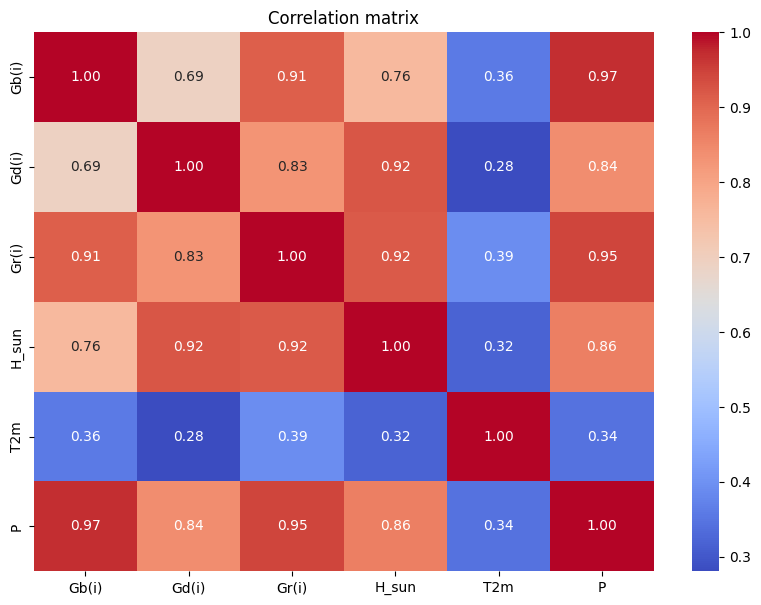

In [57]:
import seaborn as sns

fig = plt.figure(figsize=(10,7))
sns.heatmap(data[['Gb(i)','Gd(i)','Gr(i)','H_sun','T2m','P']].corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation matrix')
plt.show()

Usaremos una función de densidad conjunta para las variables que están altamente relacionadas con el valor de P, que se traduce en la producción

La idea es construir una función densidad de probabilidad dada una categoría de producción, de esta manera, tendremos que para un valor de Gb(i),Gr(i),Gd(i) se le asocia una probabilidad a pertecener a una categoría en particular, el resultado se constrasta con una red neuronal densa para la clasificación.

Now, we associate a score based on the characteristics

In [58]:
from sklearn.neighbors import KernelDensity
import numpy as np
import joblib
import pandas as pd



X = df_final[['Gb(i)', 'Gd(i)', 'Gr(i)']]  # Variables independientes
y = df_final['Produccion']  # Variable categórica ('low', 'normal', 'high')

# Filtrar por categoría y ajustar KDE para cada clase
for clase in y.unique():
    subset = df_final[df_final['Produccion'] == clase][['Gb(i)', 'Gd(i)', 'Gr(i)']]
    kde = KernelDensity(kernel='gaussian', bandwidth=50).fit(subset)
    joblib.dump(kde, f'../models/kernel_{clase}')

    
# Crear un nuevo punto como DataFrame para evaluar
nuevo_punto_df = pd.DataFrame([[390, 170, 11]], columns=['Gb(i)', 'Gd(i)', 'Gr(i)'])

# Lista de clases previamente identificadas (por ejemplo, 'low', 'normal', 'high')
clases = ['low', 'normal', 'high']  # Cambiar según tus datos

# Calcular probabilidad para el nuevo punto cargando los modelos
probabilidades = {}

for clase in clases:
    # Cargar el modelo guardado para cada clase
    modelo_path = f'../models/kernel_{clase}'  # Ruta al archivo del modelo
    kde = joblib.load(modelo_path)
    
    # Calcular la densidad logarítmica y convertir a probabilidad
    log_densidad = kde.score_samples(nuevo_punto_df)  # Usar el DataFrame 
    probabilidades[clase] = np.exp(log_densidad[0])

# Normalizar probabilidades
suma = sum(probabilidades.values())
probabilidades_normalizadas = {k: v / suma for k, v in probabilidades.items()}

# Mostrar resultados
print("Probabilidades normalizadas:")
for clase, prob in probabilidades_normalizadas.items():
    print(f"  {clase}: {prob:.2f}")


Probabilidades normalizadas:
  low: 0.08
  normal: 0.92
  high: 0.00


In [59]:
from sklearn.neighbors import KernelDensity
import numpy as np
import joblib


X = df_final[['Gb(i)', 'Gd(i)', 'Gr(i)']]  # Variables independientes
y = df_final['Produccion']  # Variable categórica ('low', 'normal', 'high')

# Filtrar por categoría y ajustar KDE para cada clase
densidades = {}
for clase in y.unique():
    subset = df_final[df_final['Produccion'] == clase][['Gb(i)', 'Gd(i)', 'Gr(i)']]
    kde = KernelDensity(kernel='gaussian', bandwidth=50).fit(subset)
    joblib.dump(kde, f'../models/kernel_{clase}')
    densidades[clase] = kde
    
    
# Crear un nuevo punto como DataFrame para evaluar
nuevo_punto_df = pd.DataFrame([[390, 170, 11]], columns=['Gb(i)', 'Gd(i)', 'Gr(i)'])

# Calcular probabilidad para el nuevo punto
probabilidades = {}

for clase, kde in densidades.items():
    log_densidad = kde.score_samples(nuevo_punto_df)  # Usar el DataFrame 
    probabilidades[clase] = np.exp(log_densidad[0])

# Normalizar probabilidades
suma = sum(probabilidades.values())
probabilidades_normalizadas = {k: v / suma for k, v in probabilidades.items()}

# Mostrar resultados
print("Probabilidades normalizadas:")
for clase, prob in probabilidades_normalizadas.items():
    print(f"  {clase}: {prob:.2f}")



Probabilidades normalizadas:
  normal: 0.92
  low: 0.08
  high: 0.00


Podemos guardar el modelo con joblib y así utilizarlo luego

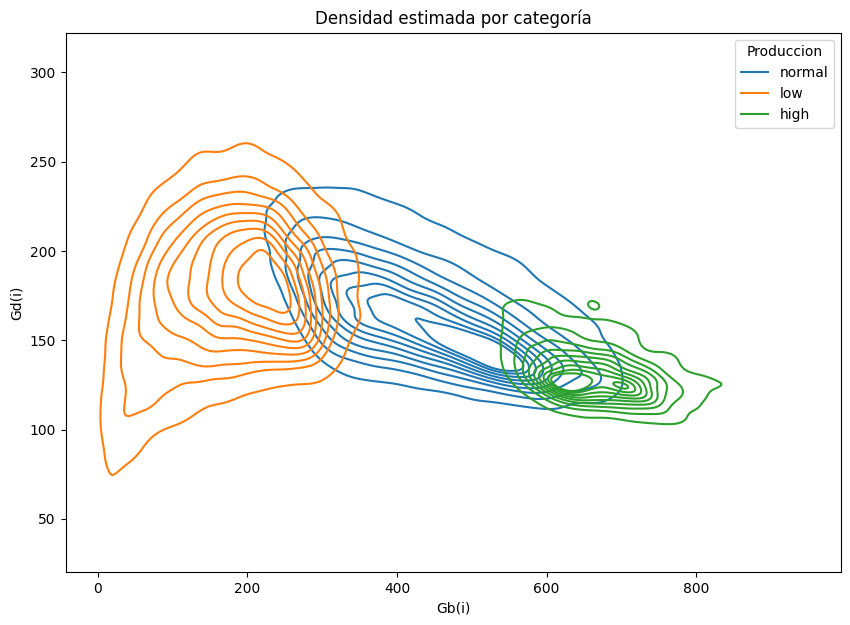

In [60]:
fig = plt.figure(figsize=(10,7))

sns.kdeplot(
    data=df_final,
    x='Gb(i)',
    y='Gd(i)',
    hue='Produccion',  # Categoría para diferenciar las densidades
    fill=False,  # Densidades sin relleno
    common_norm=False  # Evitar normalizar entre categorías
)

plt.title("Densidad estimada por categoría")
plt.xlabel("Gb(i)")
plt.ylabel("Gd(i)")
plt.show()

Ahora, el objetivo es que podamos pasar datos al modelo, de un mes en una región deseada, con esto, se calcula la probabilidad de producción por cada día
y posterior a estos valores, le asignamos un viability_score, dandon información de qué tan viable es implementar paneles solares en esa región particular basada
en los datos de ese mes.

In [61]:
# pormediamos por día los datos que llegan por hora

def toDay(data:pd.DataFrame):
    data['Dia'] = data['time'].dt.date
    
    # Filtrar las horas donde G(i) > 0 (ignorar radiación cero)
    df_filtered = data[data['Gb(i)'] > 0]

    # Agrupar por día, calculando el promedio de G(i) por día
    df_avg = df_filtered.groupby(['Dia'])[['Gb(i)','Gd(i)','Gr(i)']].mean().reset_index()

    return df_avg

def predScore(data: pd.DataFrame) -> pd.DataFrame:
    values = data[['Gb(i)', 'Gd(i)', 'Gr(i)']]
    
    # Crear un DataFrame para almacenar las probabilidades
    probabilidades = pd.DataFrame(index=values.index, columns=densidades.keys())

    # Calcular las probabilidades para cada clase
    for clase, kde in densidades.items():
        log_densidad = kde.score_samples(values)  # Pasar todo el DataFrame
        probabilidades[clase] = np.exp(log_densidad)  # Convertir log-densidad a densidad

    # Normalizar probabilidades (como DataFrame)
    probabilidades_normalizadas = probabilidades.div(probabilidades.sum(axis=1), axis=0)

    # Agregar las probabilidades normalizadas al DataFrame original
    for clase in densidades.keys():
        data[f'Prob_{clase}'] = probabilidades_normalizadas[clase]

    return data


def viability(data: pd.DataFrame) -> pd.DataFrame:
    """
    Calcula un score global de viabilidad basado en las probabilidades normalizadas de producción,
    considerando la frecuencia de días con producción 'low', 'normal', y 'high'.
    Agrega dos columnas al DataFrame: 'Score_Global' y 'Viable'.
    
    Args:
        data (pd.DataFrame): DataFrame con las columnas 'Prob_low', 'Prob_normal', y 'Prob_high'.
        
    Returns:
        pd.DataFrame: El DataFrame original con las columnas 'Score_Global' y 'Viable' añadidas.
    """
    # Asegurar que las columnas necesarias están presentes
    required_columns = ['Prob_low', 'Prob_normal', 'Prob_high']
    for col in required_columns:
        if col not in data.columns:
            raise ValueError(f"La columna '{col}' no está en el DataFrame.")
    
    # Calcular la frecuencia de cada categoría
    total_dias = len(data)
    
    meanProbHigh = data['Prob_high'].mean()
    meanProbNormal = data['Prob_normal'].mean()
    meanProbLow = data['Prob_low'].mean()
    
    if (meanProbHigh + meanProbNormal >= 2* meanProbLow):
        viability = 'Viable'
    else:
        viability = 'Not Viable'
        
    # Normalizar probabilidades promedio
    
    annotation = f""" 
            {viability}
    """
    
    #annotation = f""" 
    #daily high prob: {np.round(meanProbHigh,3)}
    #daily normal prob: {np.round(meanProbNormal,3)}
    #daily low prob: {np.round(meanProbLow,3)}
    #        {viability}
    #"""

    return annotation
    
    

In [62]:
data_test = pd.DataFrame({
    'Gb(i)': [200, 300, 400, 500, 400],
    'Gd(i)': [100, 200, 300, 390, 250],
    'Gr(i)': [50, 30, 90, 20, 100],
    'Fecha': pd.date_range(start='2024-12-01', periods=5, freq='D')
})


In [63]:
# Aplicar predScore para obtener las probabilidades normalizadas
data_with_probs = predScore(data_test)

# Aplicar viability para calcular el Score_Global y la viabilidad
#result = viability(data_with_probs)

# Mostrar el resultado
#result
data_with_probs


,Gb(i),Gd(i),Gr(i),Fecha,Prob_normal,Prob_low,Prob_high
0,200,100,50,2024-12-01,0.043949,0.956051,3.467282e-12
1,300,200,30,2024-12-02,0.507552,0.492447,3.196362e-07
2,400,300,90,2024-12-03,0.907258,0.092127,6.149687e-04
3,500,390,20,2024-12-04,0.948516,0.026135,2.534956e-02
4,400,250,100,2024-12-05,0.925614,0.073608,7.778589e-04


Ahora, podemos prescindir de pequeños datos de prueba y procedemos a calcular la viabilidad de todos los departamentos en Colombia.

In [64]:
annot = viability(data_with_probs)
print(annot)


 
            Viable
    


In [65]:
# Cargar tus datos
data = toDay(data2)
data

,Dia,Gb(i),Gd(i),Gr(i)
0,2018-01-01,294.754899,172.122783,9.675246
1,2018-01-02,356.599885,166.327954,10.531354
2,2018-01-03,415.088674,165.868934,11.547349
3,2018-01-04,425.210325,166.058343,11.750651
4,2018-01-05,399.151047,170.324215,11.434709
...,...,...,...,...
2186,2023-12-27,326.834886,155.404714,9.768314
2187,2023-12-28,370.194986,155.818963,10.626744
2188,2023-12-29,423.571839,156.637385,11.490891
2189,2023-12-30,407.802450,154.093285,11.149337


Cargamos por separado los datos para cada departamento

In [66]:
# Load the data

# Ruta de la carpeta con los archivos CSV
folder_path = "../data/raw/AllDepartments/"

# Lista para almacenar los DataFrames
dataframes = {}

for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):  
        department_name = filename.replace(".csv", "")  # Obtener el nombre del departamento
        file_path = os.path.join(folder_path, filename)  # Ruta completa del archivo
        
        # Leer el archivo CSV y asignarlo al diccionario
        dataframes[department_name] = pd.read_csv(file_path,skiprows=10,skipfooter=13,engine="python")   # Necesario para skipfooter)

In [67]:
dataframes.keys()

dict_keys(['Cordoba', 'NorteSantander', 'Magdalena', 'Cauca', 'Tolima', 'Vichada', 'Meta', 'Guajira', 'Cesar', 'Quindio', 'Boyaca', 'Cundinamarca', 'Caqueta', 'Putumayo', 'Santander', 'Bolivar', 'Caldas', 'Antioquia', 'Casanare', 'SanAndres', 'Atlantico', 'Nariño', 'Huila', 'Risaralda', 'Arauca', 'Sucre', 'Choco', 'Guainia', 'Vaupes', 'Guaviare', 'Amazonas', 'ValleCauca'])

Luego de cargar todos los dataframes de cada departamento por separado los agrupamos en días

In [68]:
dayDepartments = {}


for department in dataframes.keys():
    dataframes[department]['time'] = pd.to_datetime(dataframes[department]['time'], format='%Y%m%d:%H%M')
    dayDepartments[department] = toDay(dataframes[department])


Ahora, para cada departamento, podemos calcular su respectivo score de producción diaria

In [69]:
annot = {}

for department in dayDepartments.keys():
    dayDepartments[department] = predScore(dayDepartments[department])
    annot[department] = viability(dayDepartments[department])

Revisamos la integridad de los datos luego de las transformaciones, como vemos la guajira sí es viable para implementar paneles solares baj o los criterios establecidos


In [70]:
annot['Guajira']

' \n            Viable\n    '

POr el contrario hay otros departamentos no viables

In [72]:
annot['Antioquia']

' \n            Not Viable\n    '

Recordemos que solo serán viables aquellos departamentos que cumplas que las probabilidades promedio diarias de high y normal sean:


prob high + prob normal >= 2* prob low

--------------------------
Algunas pruebas
--------------------------

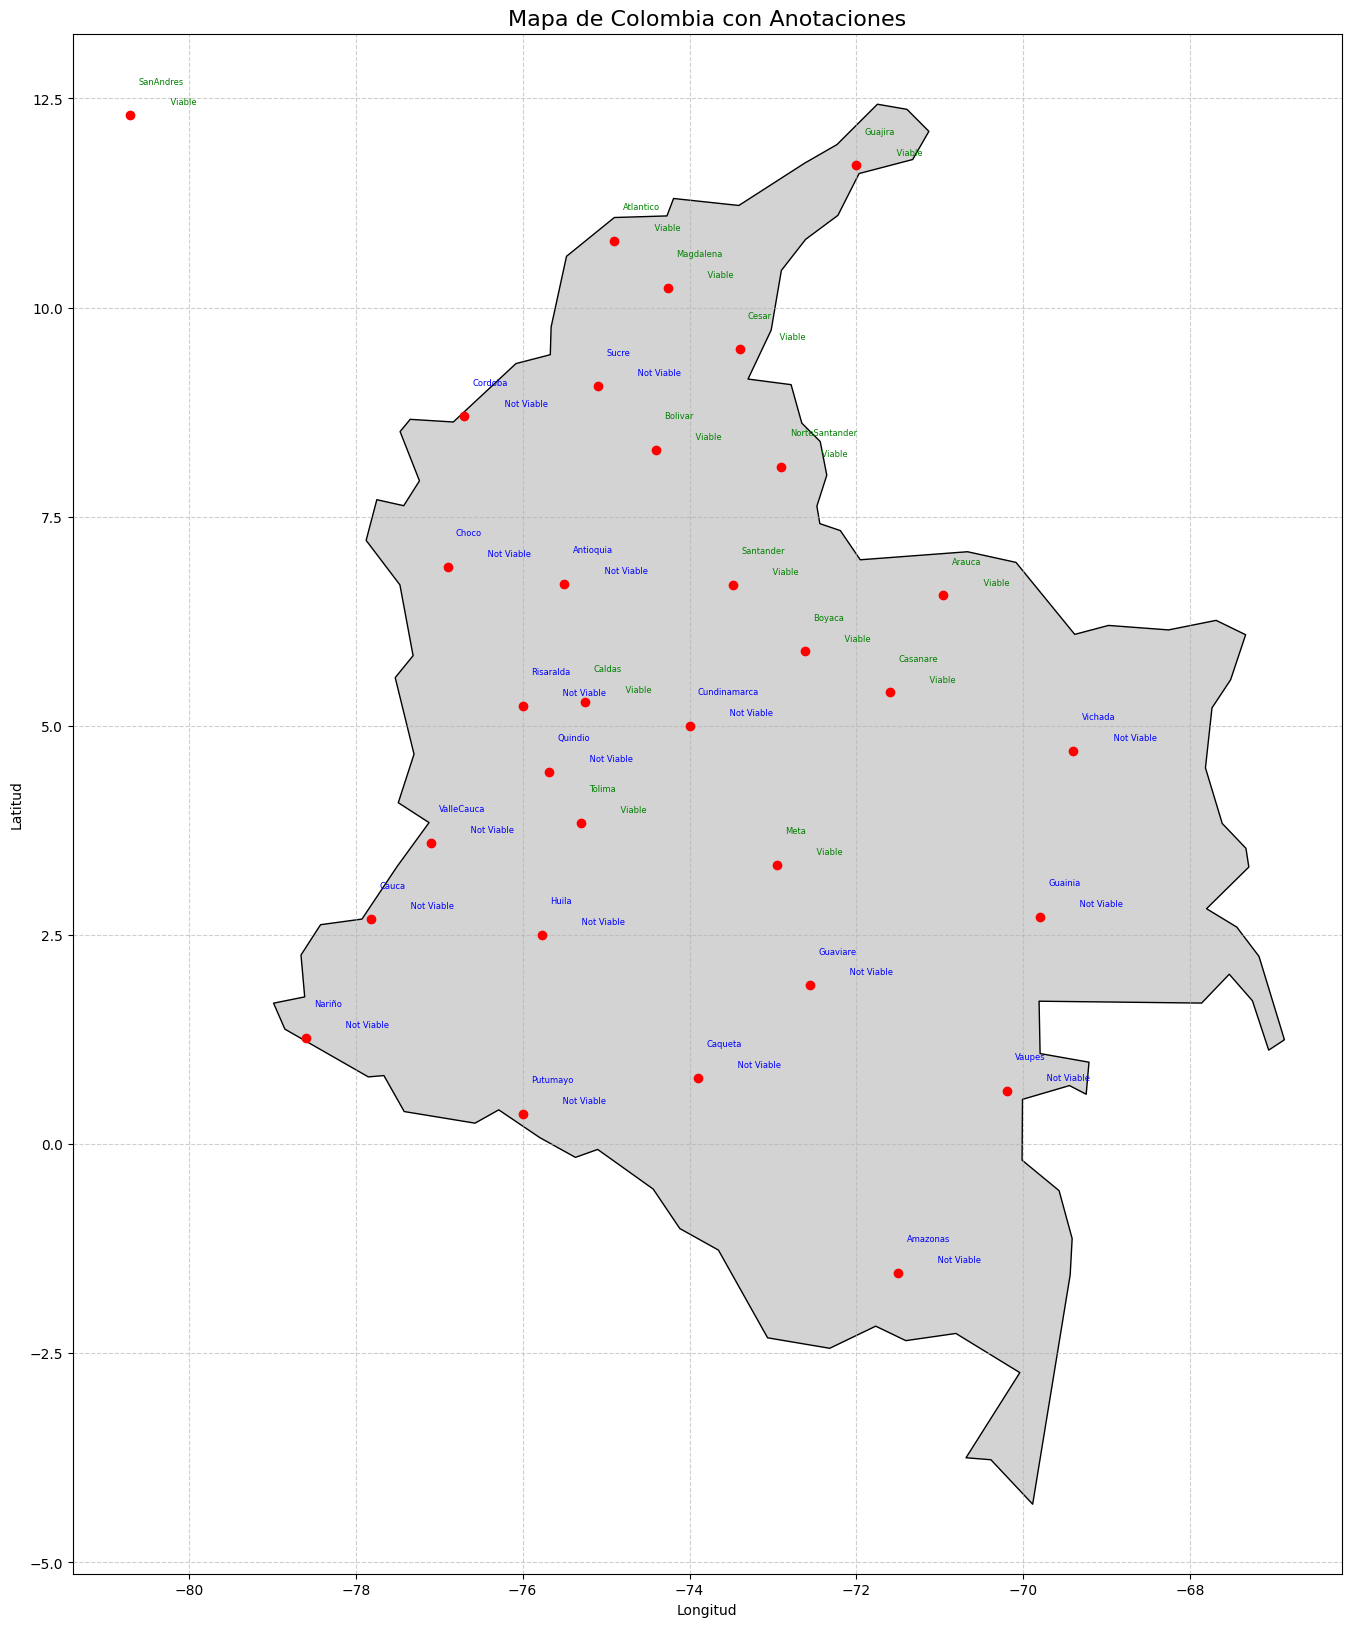

In [73]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Descargar datos directamente desde Natural Earth
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
colombia = world[world['ADMIN'] == 'Colombia']

# Crear el plot
fig, ax = plt.subplots(figsize=(20, 20))
colombia.plot(ax=ax, color='lightgrey', edgecolor='black')

# Agregar anotaciones
for dept, coords in departments_coordinates.items():
    lat, lon = coords['latitude'], coords['longitude']
    ax.plot(lon, lat, 'ro')  # Punto rojo en las coordenadas
    annotation = f'{dept}\n' + annot[dept] 
    
    if 'Not' in annot[dept]:
        ax.text(lon + 0.1, lat, annotation, fontsize=6, color='blue')  # Texto cerca del punto
    else:
        ax.text(lon + 0.1, lat, annotation, fontsize=6, color='green')  # Texto cerca del punto

# Personalizar el plot
ax.set_title('Mapa de Colombia con Anotaciones', fontsize=16)
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()



In [ ]:
import plotly.express as px
import pandas as pd 

# Coordenadas de departamentos
departments_coordinates = {
    'Antioquia': {'latitude': 6.5, 'longitude': -75.5},
    'Bogotá': {'latitude': 4.7, 'longitude': -74.1},
    'Cali': {'latitude': 3.4, 'longitude': -76.5},
    'Barranquilla': {'latitude': 10.9, 'longitude': -74.8},
}

# Convertir el diccionario a un DataFrame
data = pd.DataFrame.from_dict(departments_coordinates, orient='index').reset_index()
data.columns = ['Department', 'Latitude', 'Longitude']

# Crear el mapa interactivo
fig = px.scatter_geo(
    data,
    lat='Latitude',
    lon='Longitude',
    text='Department',  # Nombre de los departamentos
    title='Mapa de Colombia con Anotaciones',
)

# Configuración del mapa base (Colombia)
fig.update_geos(
    visible=True,
    resolution=50,
    scope="south america",
    center={"lat": 4.6, "lon": -74.1},  # Centrar en Colombia
    projection_scale=5,  # Nivel de zoom
    showland=True,
    landcolor="lightgrey",
    showocean=True,
    oceancolor="lightblue",
    showlakes=True,
    lakecolor="blue",
)

# Mostrar el gráfico
import plotly.io as pio
pio.renderers.default = 'browser'  # Cambia el renderer a navegador
fig.show()

